In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [244]:
plt.style.use('dark_background')

In [245]:
file = 'marketing_campaign.csv'
df = pd.read_csv(file, sep="\t")

### Overview Metadata Information

In [246]:
print(df.shape)
df.head()

(2240, 29)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

The Z_CostContact and Z_Revenue columns are not informative since values within these 2 columns are all the same. Suggest to drop them

In [248]:
print(df['Z_CostContact'].value_counts())
print(df['Z_Revenue'].value_counts())


3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [249]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [250]:
df.shape

(2240, 27)

### Documentation

In [251]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

    # People
    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

    # Products
    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

    # Promotion
    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

    # Place
    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

### Analytics


    Exploring data types (dtypes)

In [252]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [253]:
df['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Single', inplace=True)

In [254]:
df['Education'].astype('category')

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: category
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [255]:
df['Education'] = df['Education'].astype("category")

In [256]:
df['Marital_Status'].astype('category')

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: category
Categories (5, object): ['Divorced', 'Married', 'Single', 'Together', 'Widow']

In [257]:
df['Marital_Status'] = df['Marital_Status'].astype("category")

In [258]:
pd.to_datetime(df['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [259]:
pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [260]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [261]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

### Continuous Variables Analysis

In [262]:
# 24 nulls in Income to be addressed by imputation later
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

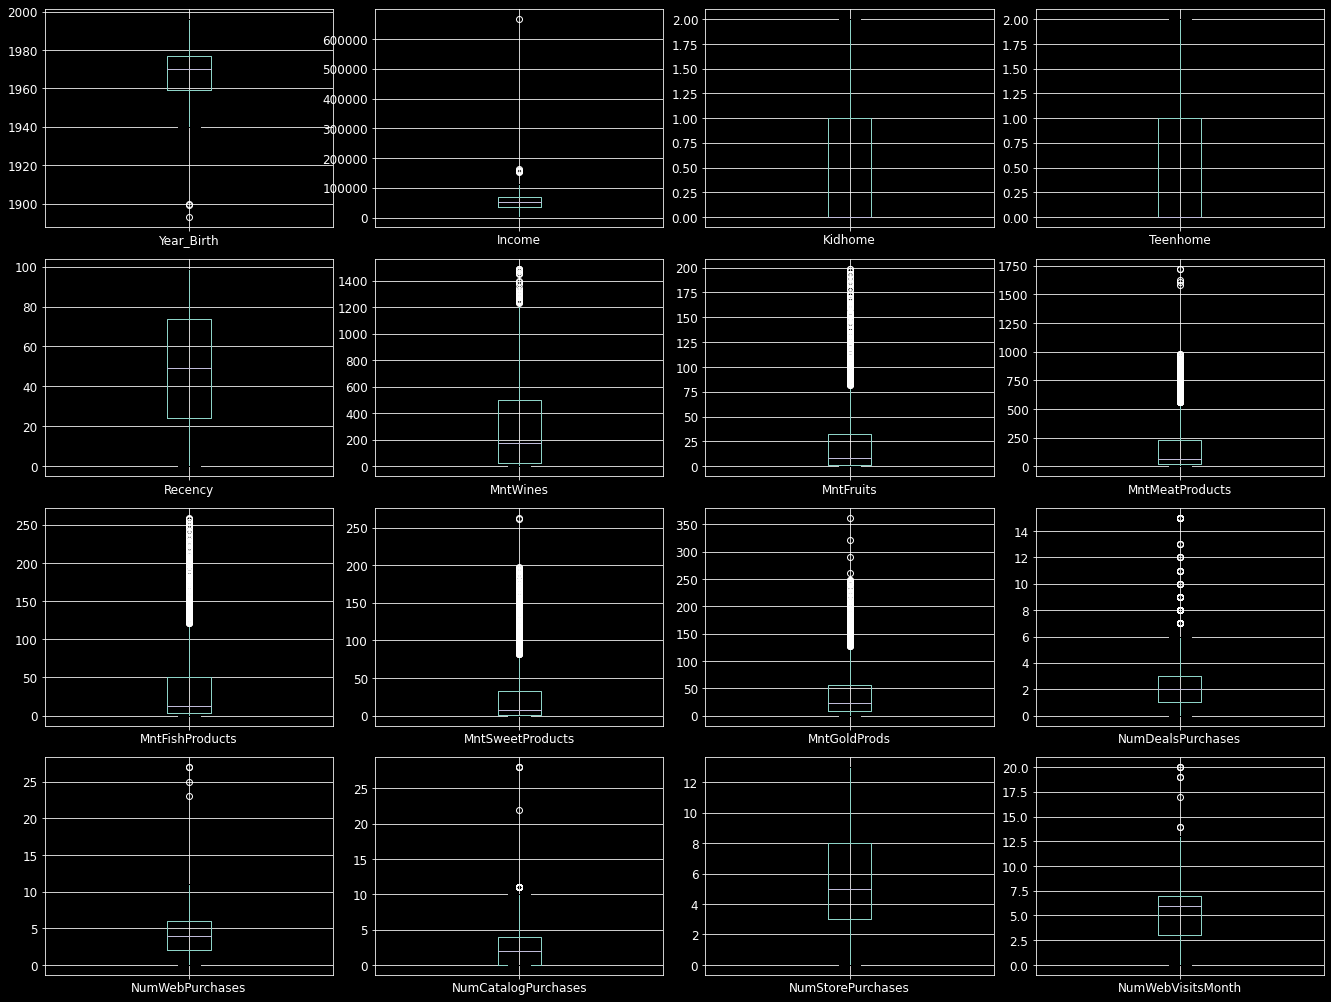

In [263]:
continuous_variables = ['Year_Birth', 'Income', 'Kidhome', 
    'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(4,4)
fig.set_size_inches(18.5, 14)
plt.tight_layout()

for index, column in enumerate(list(df[continuous_variables].columns.values)):
    a = df.boxplot(column, ax = ax.flatten()[index], fontsize='large')


plt.show()

    Observations

    Year_Birth: The bulk of values reside between 1940 - 2000, Odd values at 1900 were observed
    Income: Outliers > 130k
    Kidhome and Teenhome: Uneventful
    Recency: Uneventful
    MntWines, MntFruits, MntMeatPurchases, MntFishPurchases, MntSweetProducts, MntGoldProds: Varying Positive Skewness i.e. Right Skew and Leptokurtic i.e. Presence of outliers
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases: Right Skewed, Presence of outliers.
    NumStorePurchases: Relatively normally distributed. No outliers.
    NumWebVisitsMonth: Normally distributed, Presence of some outliers.


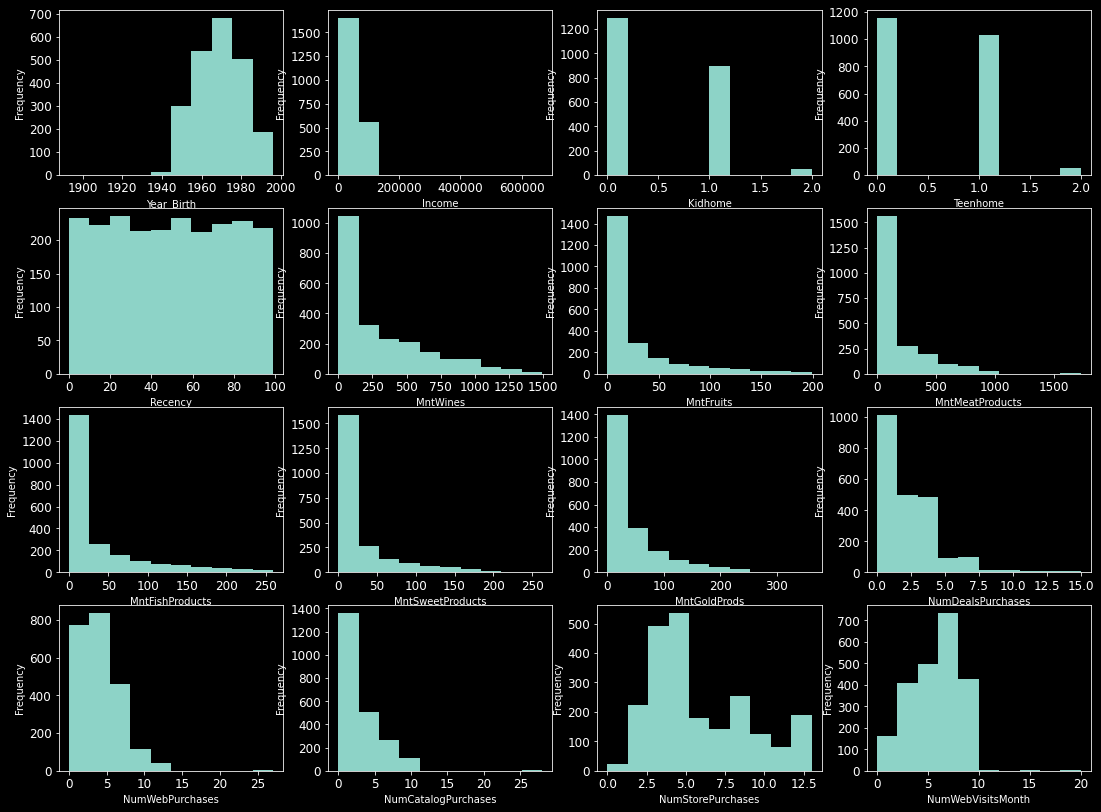

In [264]:
continuous_variables = ['Year_Birth', 'Income', 'Kidhome', 
    'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(4,4)
fig.set_size_inches(18.5, 14)

for index, column in enumerate(list(df[continuous_variables].columns.values)):
    a = df[column].plot.hist(ax = ax.flatten()[index], fontsize='large')
    a.set_xlabel(column)

plt.show()

In [265]:
for i in list(df[continuous_variables].columns.values):
    print(f'{i}: Skew:{df[i].skew()}, Kurtosis:{df[i].kurtosis()}')

Year_Birth: Skew:-0.34994385918269544, Kurtosis:0.717464442459137
Income: Skew:6.763487372811116, Kurtosis:159.6366995778005
Kidhome: Skew:0.6352884633879472, Kurtosis:-0.7796614905591994
Teenhome: Skew:0.4071148777989442, Kurtosis:-0.9862349387289964
Recency: Skew:-0.0019866586335935076, Kurtosis:-1.2018967992387302
MntWines: Skew:1.1757705637550502, Kurtosis:0.5987435935182441
MntFruits: Skew:2.1020633046228268, Kurtosis:4.050976251101475
MntMeatProducts: Skew:2.083233112943474, Kurtosis:5.516724101399635
MntFishProducts: Skew:1.9197689706698498, Kurtosis:3.096460912277143
MntSweetProducts: Skew:2.136080712154738, Kurtosis:4.376548260573513
MntGoldProds: Skew:1.8861056091894417, Kurtosis:3.55170925005139
NumDealsPurchases: Skew:2.4185693876889256, Kurtosis:8.936914320695886
NumWebPurchases: Skew:1.382794296403589, Kurtosis:5.703128364201298
NumCatalogPurchases: Skew:1.880988777771172, Kurtosis:8.04743678930087
NumStorePurchases: Skew:0.7022372855251121, Kurtosis:-0.6220482770902964
N

### Categorical Variables Analysis

In [266]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

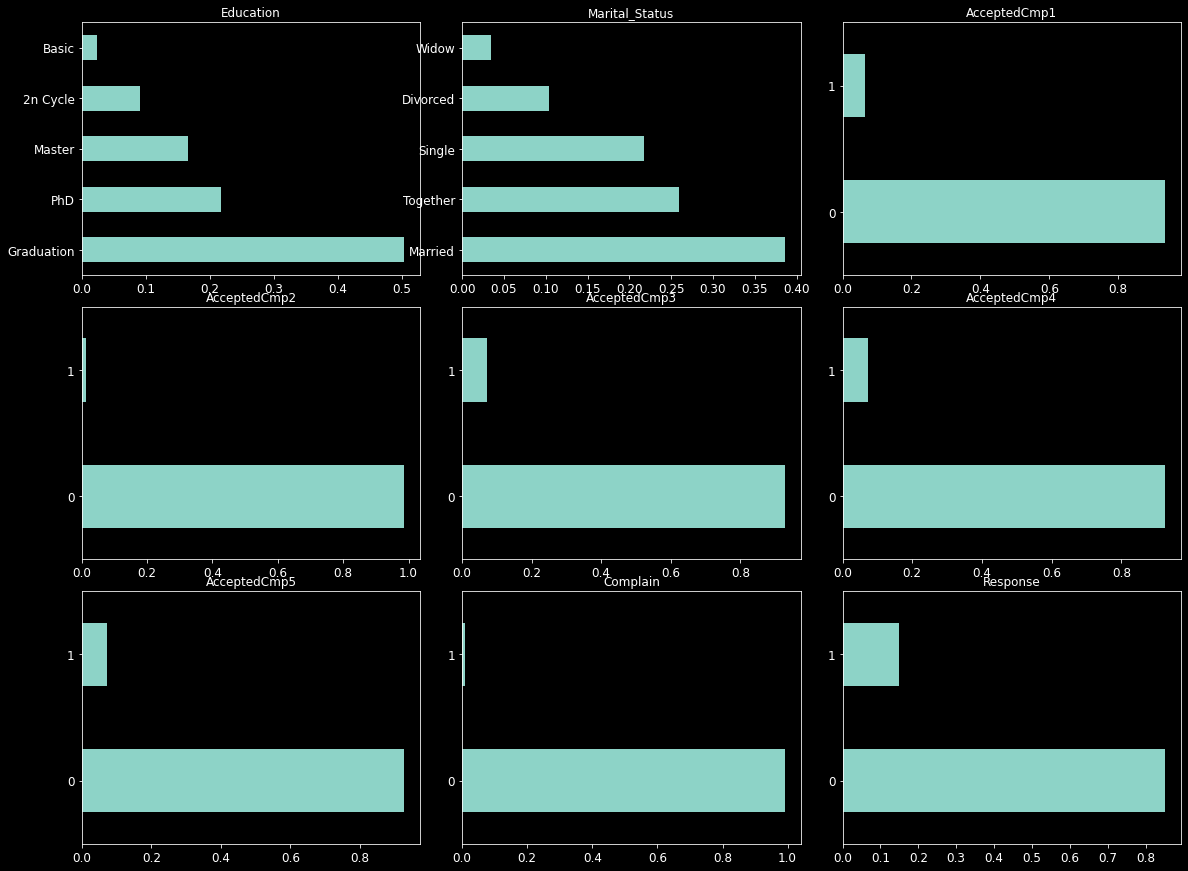

In [267]:
categorical_variables = ['Education', 'Marital_Status', 'AcceptedCmp1', 
        'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
        'Complain', 'Response']

fig, ax = plt.subplots(3,3)
fig.set_size_inches(16, 12)
plt.tight_layout()

for index, column in enumerate(df[categorical_variables]):
    counts = df[column].value_counts() / df.shape[0]
    counts.plot(kind = 'barh', ax = ax.flatten()[index], fontsize='large').set_title(column)

plt.show()

In [268]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [269]:
for i in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
        'AcceptedCmp5', 'Complain', 'Response']:
    print(f'{df[i].value_counts()/df.shape[0]*100}')

0    93.571429
1     6.428571
Name: AcceptedCmp1, dtype: float64
0    98.660714
1     1.339286
Name: AcceptedCmp2, dtype: float64
0    92.723214
1     7.276786
Name: AcceptedCmp3, dtype: float64
0    92.544643
1     7.455357
Name: AcceptedCmp4, dtype: float64
0    92.723214
1     7.276786
Name: AcceptedCmp5, dtype: float64
0    99.0625
1     0.9375
Name: Complain, dtype: float64
0    85.089286
1    14.910714
Name: Response, dtype: float64


    Observations
    
    Education: 20% of respondents hold PhD. An indication that this might not be representative of the population? Also, What is the definition of 2n Cycle and what is the definition of basic?
    Marital Status: Presence of incredulous values such as 'YOLO' and 'Absurd'. Upon further investifation, you see that Alone, Absurd and YOLO make up 7 of the 2240 entries. We might want to consider removing these values from the population.
    AcceptedCmp refers to the campaigns that customers have accepted. Unbalanced columns where only ~10% of the respondents are likely to accept the cammpaigns, With the exception of AcceptedCmp2. 
    Response: What is response?
    
    


In [270]:
df['Dt_Customer'].describe(datetime_is_numeric=True)

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

### Datetime Analysis

    Between 30 Jul 2012 and 29 Jun 2014

<AxesSubplot:xlabel='Dt_Customer'>

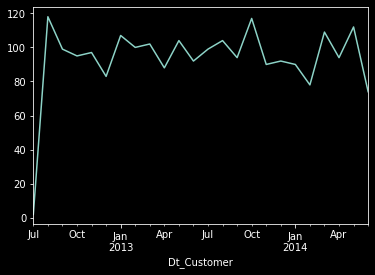

In [271]:
df.groupby(pd.Grouper(key='Dt_Customer', freq='M')).count().ID.plot(x='index')

### Bivariable Data Analysis

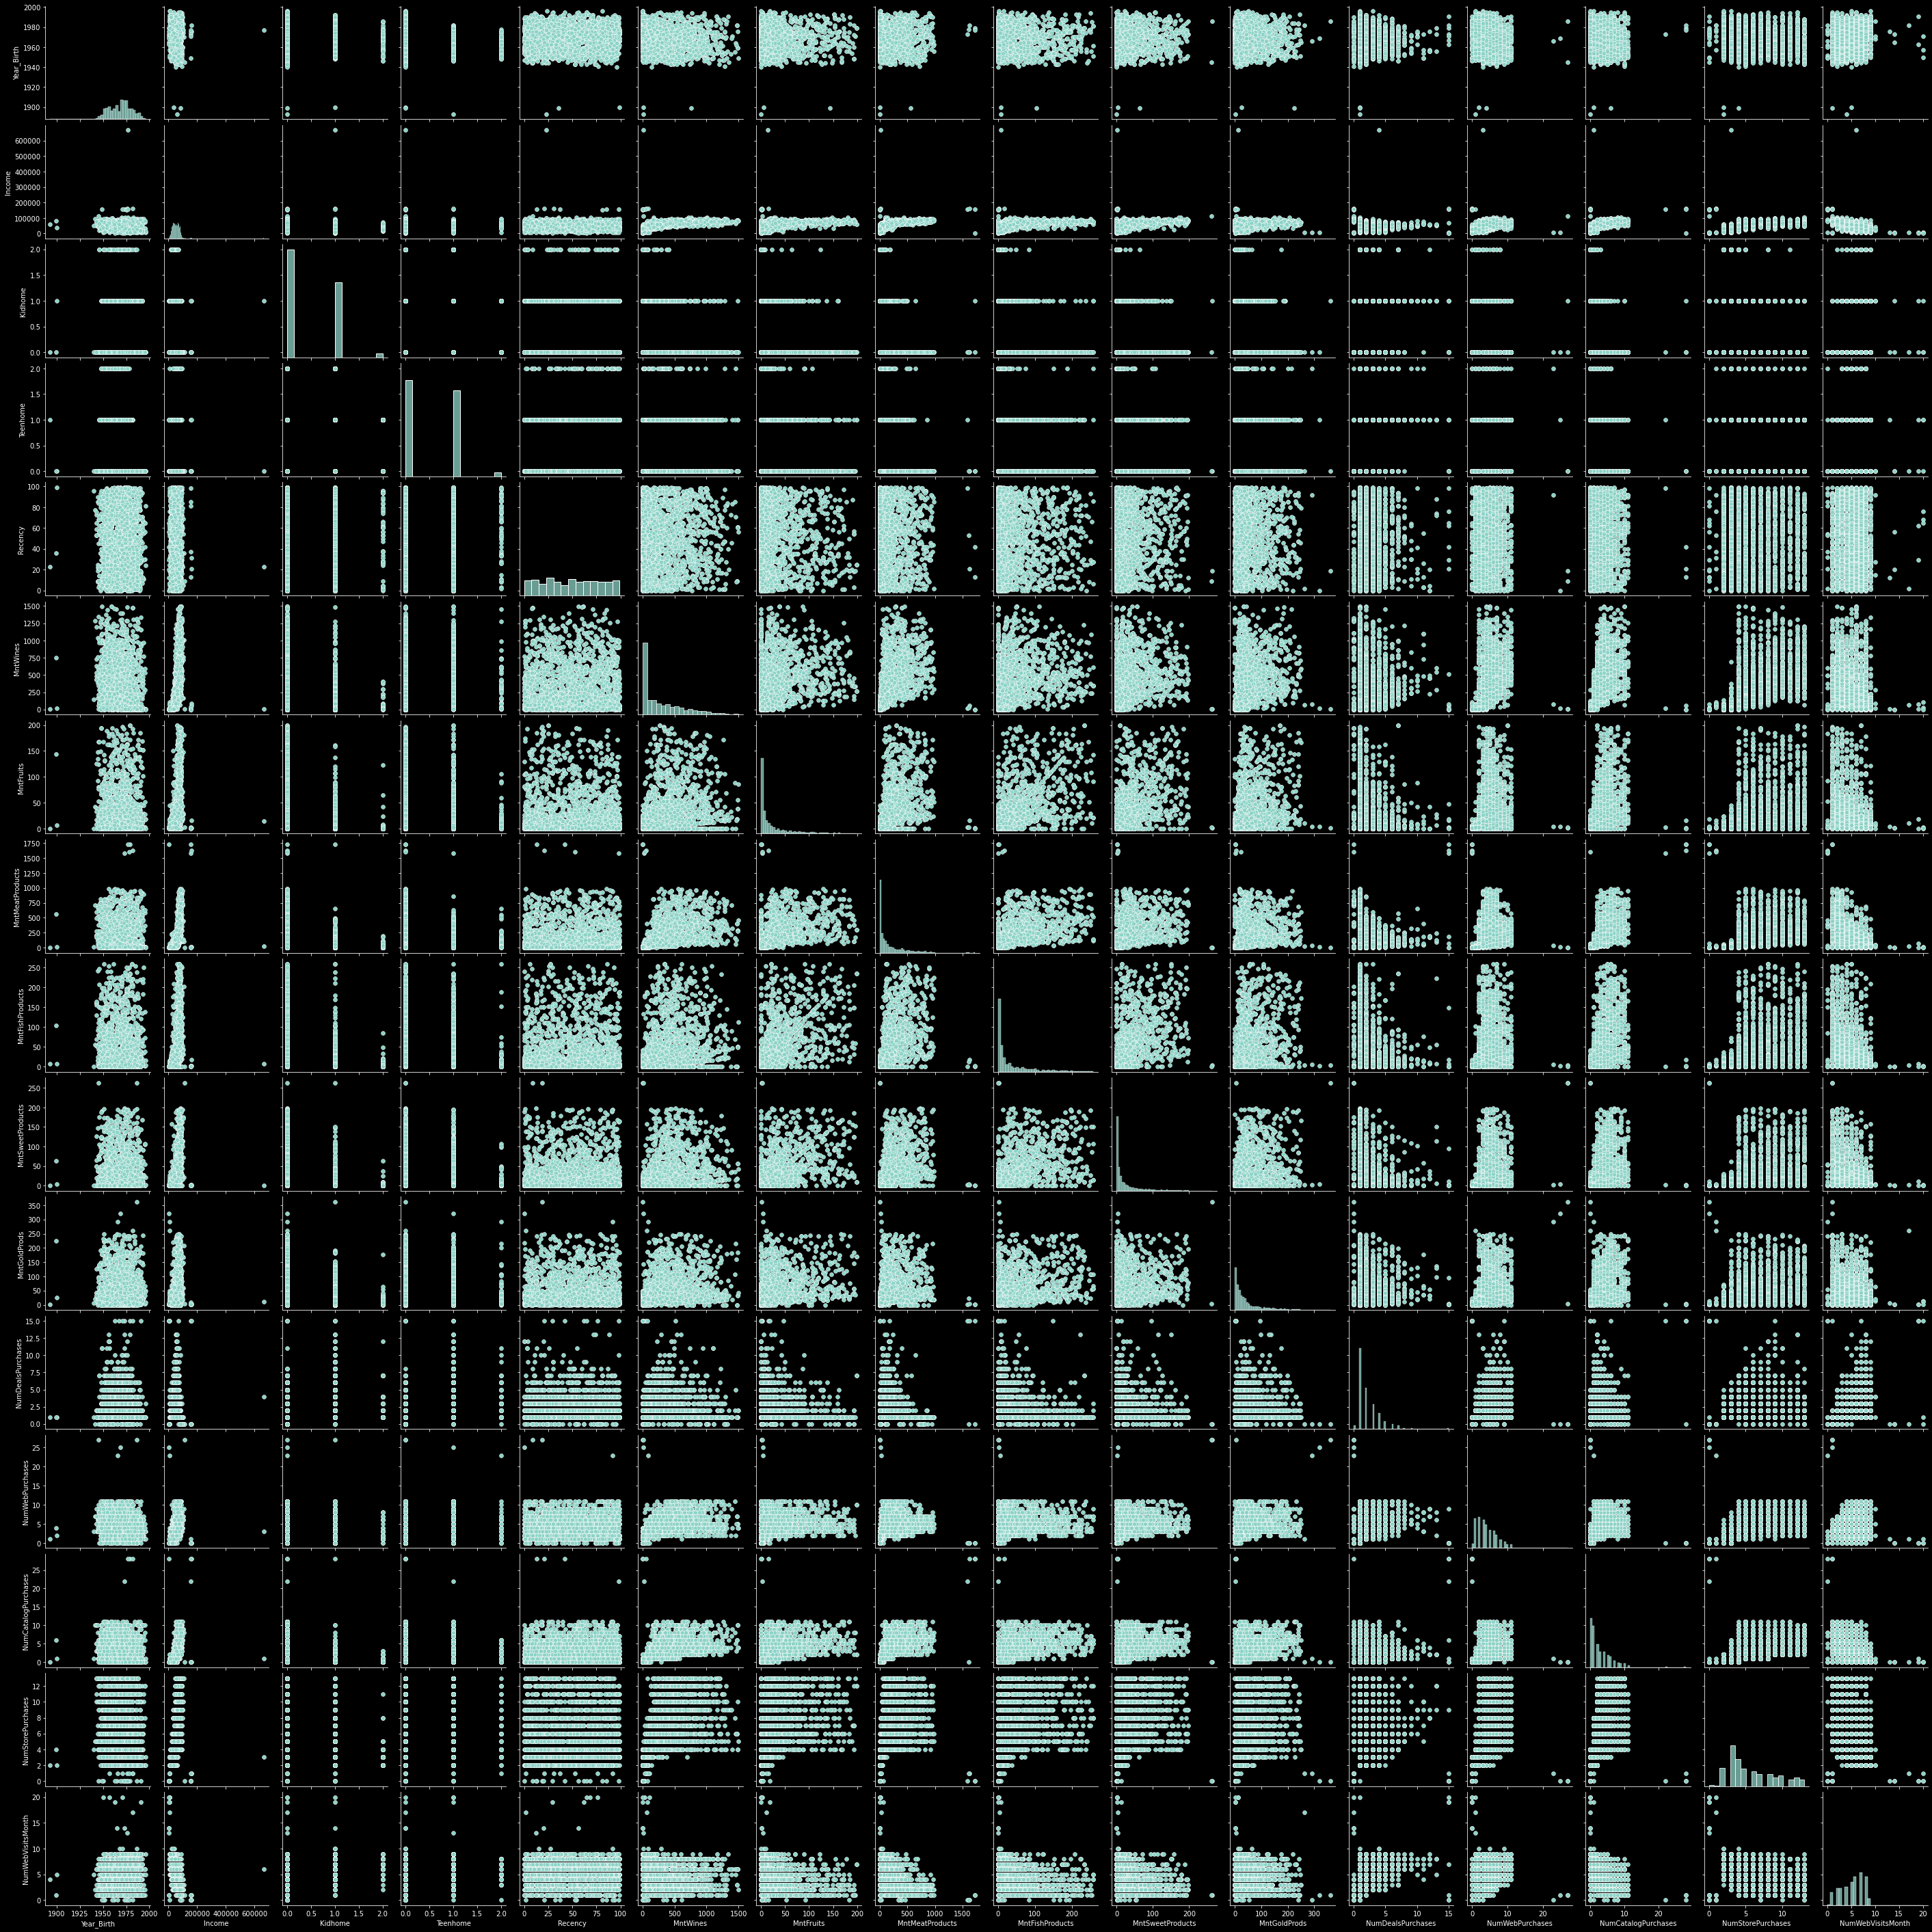

In [272]:
sns.pairplot(data=df[continuous_variables])

[[<AxesSubplot:xlabel='Year_Birth', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Income', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Kidhome', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Teenhome', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Recency', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntWines', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntFruits', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntMeatProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntFishProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntSweetProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntGoldProds', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumDealsPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumWebPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumStorePurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Year_Birth'>]
 [<AxesSubplot:xlabel='Year_Birth', ylabel='Incom

<Figure size 1332x1008 with 0 Axes>

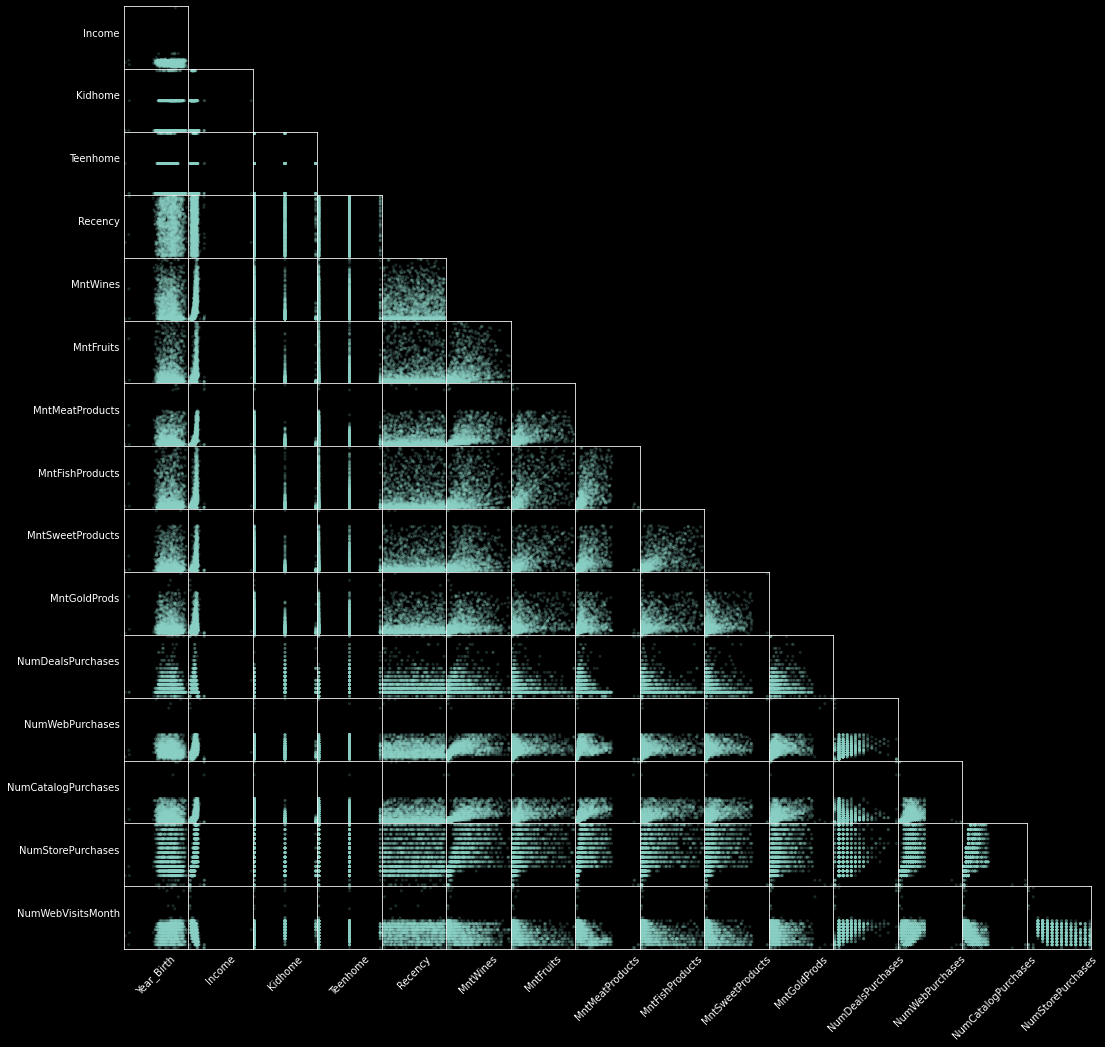

In [273]:
plt.figure(figsize=(18.5, 14))
sm = pd.plotting.scatter_matrix(
    df[continuous_variables],
    figsize=(18.5,18.5), alpha=0.2)

for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

print(sm)

    Removing Outliers


In [274]:
df_subset = df[continuous_variables].dropna()

In [275]:
# removing rows that contain values are beyond 3 standard deviations away from the mean in ANY column
df_subset = df_subset[(np.abs(stats.zscore(df_subset)) < 3).all(axis=1)]

[[<AxesSubplot:xlabel='Year_Birth', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Income', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Kidhome', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Teenhome', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='Recency', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntWines', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntFruits', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntMeatProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntFishProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntSweetProducts', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='MntGoldProds', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumDealsPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumWebPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumStorePurchases', ylabel='Year_Birth'>
  <AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Year_Birth'>]
 [<AxesSubplot:xlabel='Year_Birth', ylabel='Incom

<Figure size 1332x1008 with 0 Axes>

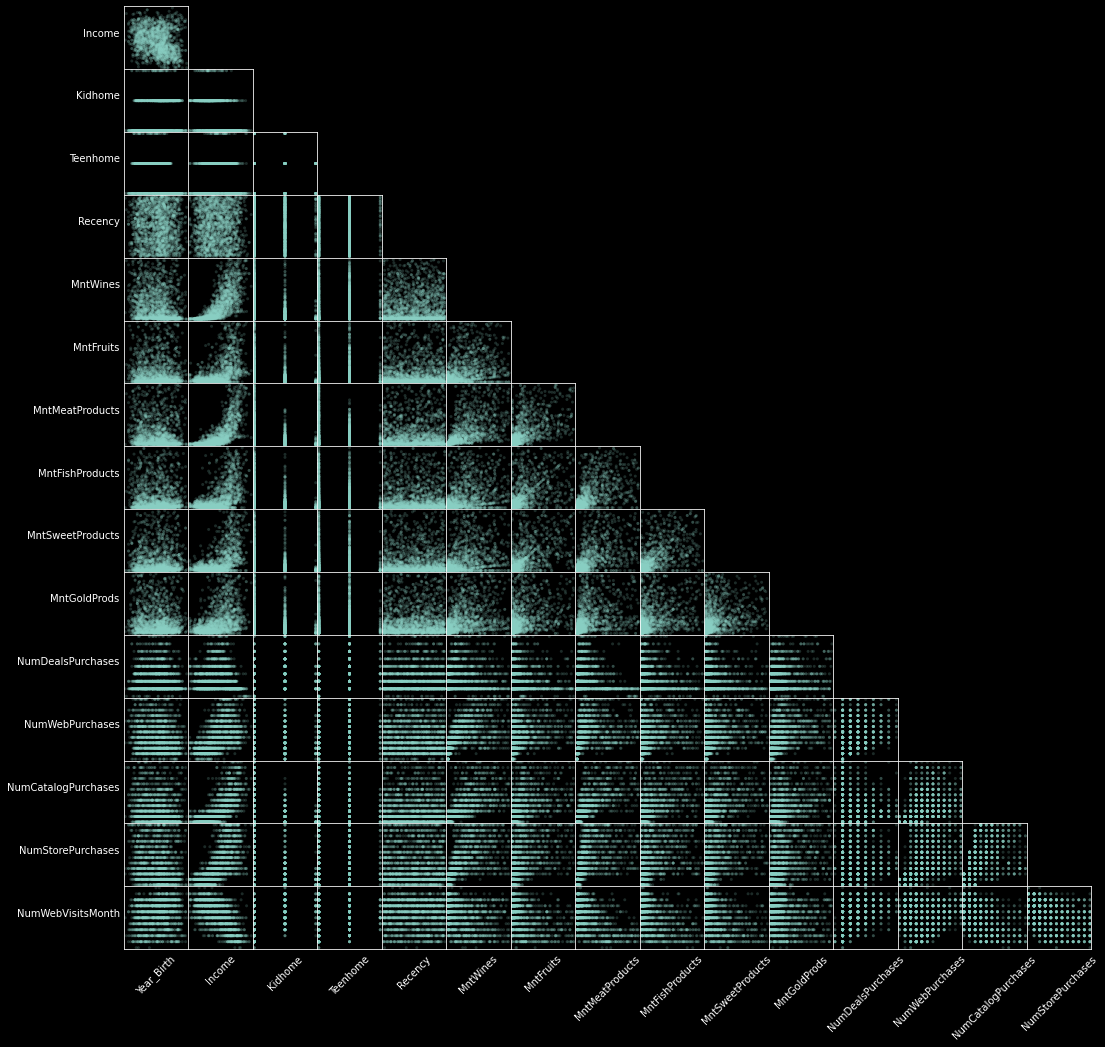

In [276]:
plt.figure(figsize=(18.5, 14))
sm = pd.plotting.scatter_matrix(
    df_subset[continuous_variables],
    figsize=(18.5,18.5), alpha=0.2
)

for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

print(sm)

### Time Series + Variable Analysis

<AxesSubplot:xlabel='Dt_Customer'>

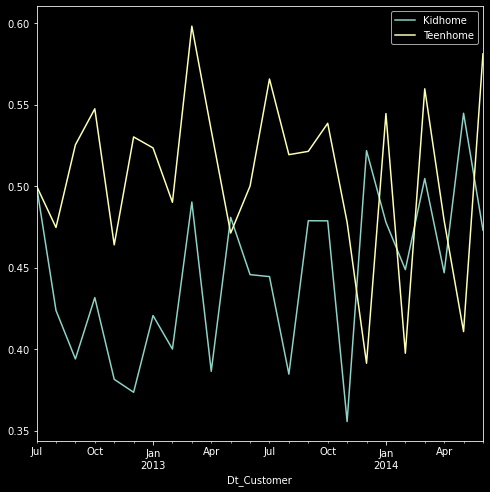

In [277]:
df_subset = df[['Dt_Customer','Kidhome','Teenhome']] 
df_subset.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean().plot(figsize=(8,8))

# Not much insights though: Are we hypothesising a certain seasonality effect influencing people to purchase goods on a certain time of the year?

<AxesSubplot:xlabel='Dt_Customer'>

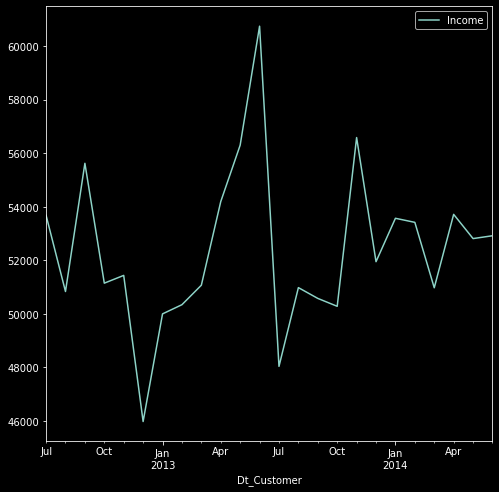

In [278]:
# pd.Grouper() - Used mainly to group datetime based on a desired frequency

df_subset = df[['Dt_Customer', 'Income']]
df_subset.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean().plot(figsize=(8,8))

# Similar here - not much insights: Are we hypothesising a certain seasonality effect influencing people to purchase goods on a certain time of the year?
# Does the peak in June inform us about some trend?

<AxesSubplot:xlabel='Dt_Customer'>

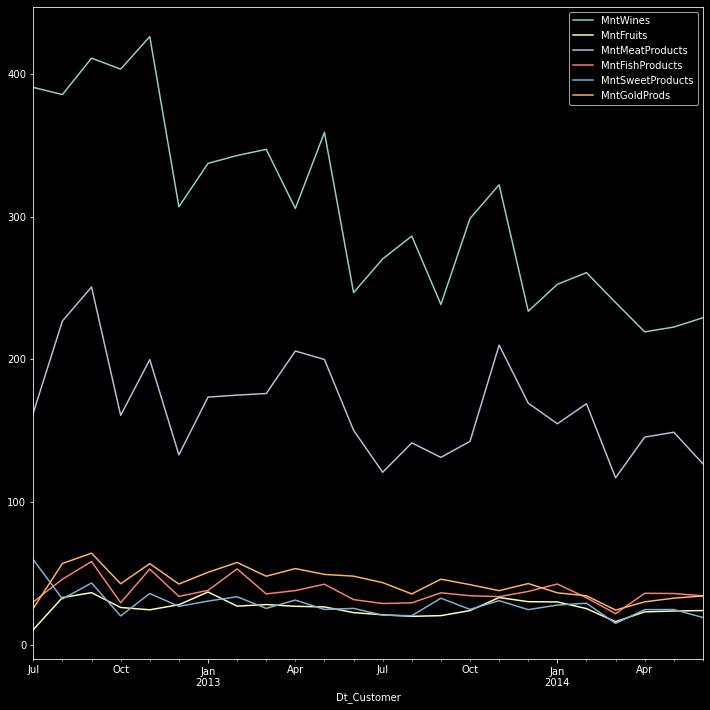

In [279]:
df_subset = df[['Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 
        'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
df_subset.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean().plot(figsize=(12,12))

# We observe a trend of decreasing sales over time

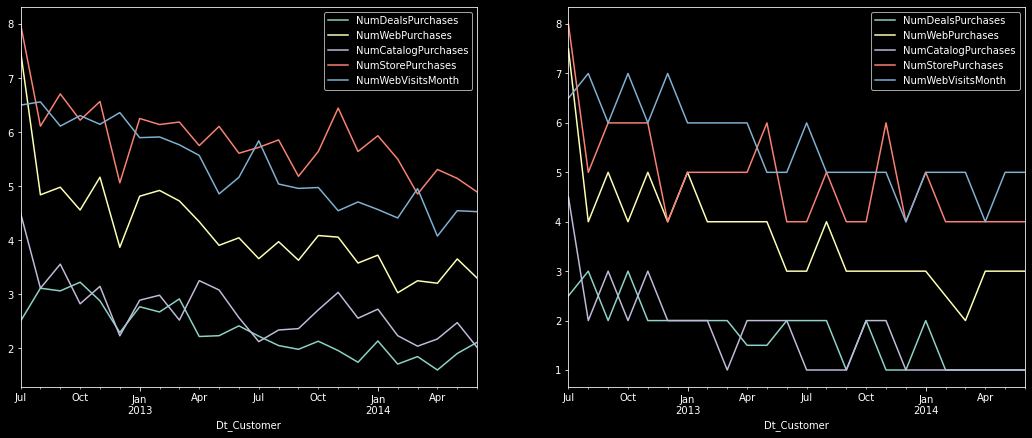

In [280]:
cont_var_subset = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_grouped = df_subset.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

df.groupby(pd.Grouper(key='Dt_Customer', freq='M')).mean()[cont_var_subset].plot(ax = ax.flatten()[0], legend=True)
df.groupby(pd.Grouper(key='Dt_Customer', freq='M')).median()[cont_var_subset].plot(ax = ax.flatten()[1], legend=True)

plt.show()

# We observe a gradual decline in the number of purchases over time

<AxesSubplot:xlabel='Dt_Customer'>

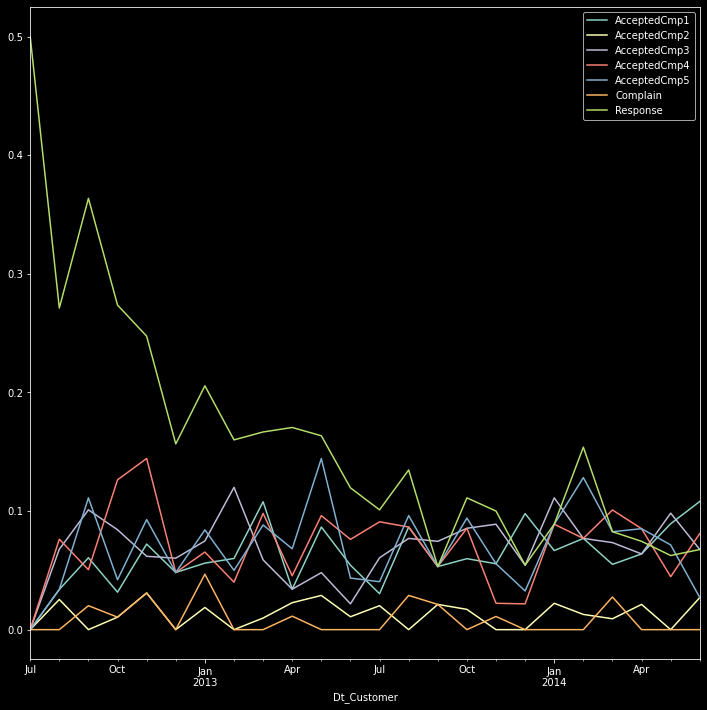

In [282]:
campaign_var_subset = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
              'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']

df.groupby(pd.Grouper(key='Dt_Customer', freq='M'))[campaign_var_subset].mean().plot(legend=True, figsize=(12,12))

# too messy

<AxesSubplot:xlabel='Dt_Customer'>

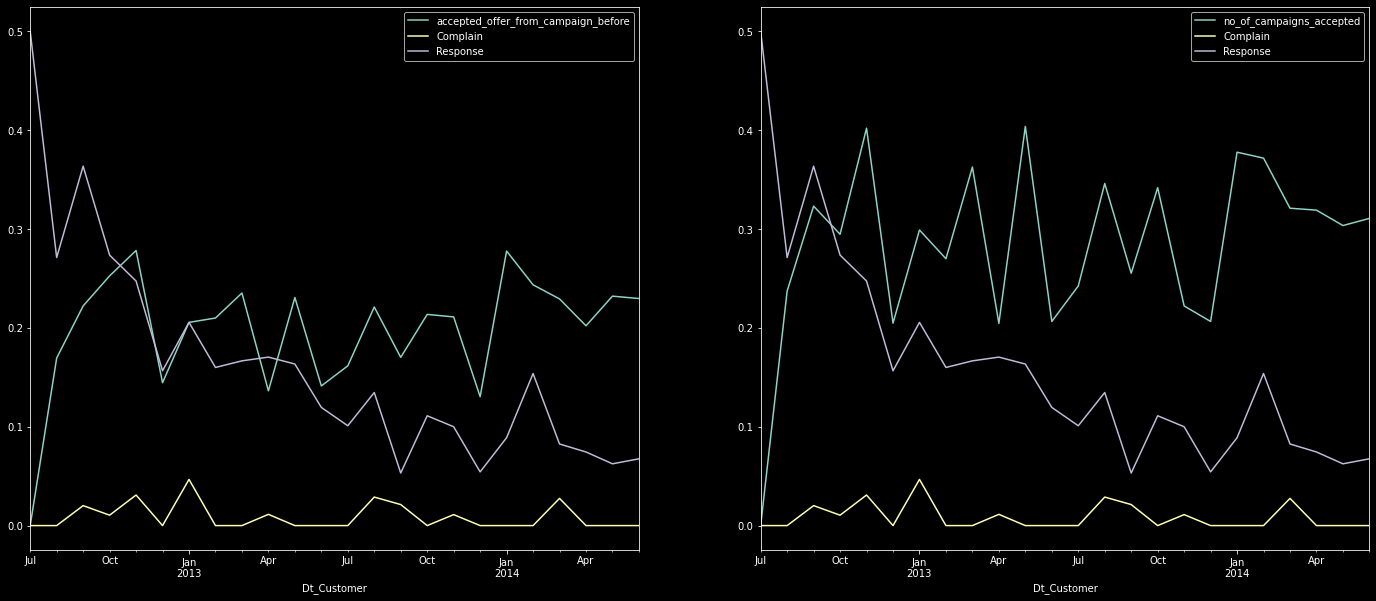

In [283]:
campaign_var_subset_2 = ['AcceptedCmp1', 'AcceptedCmp2', 
        'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5',]
df['accepted_offer_from_campaign_before'] = df[campaign_var_subset_2].max(axis=1)
df['no_of_campaigns_accepted'] = df[campaign_var_subset_2].sum(axis=1)

columns_for_left_graph = ['accepted_offer_from_campaign_before', 'Complain', 'Response']
columns_for_right_graph = ['no_of_campaigns_accepted', 'Complain', 'Response']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

df.groupby(pd.Grouper(key='Dt_Customer', freq='M'))[columns_for_left_graph].mean().plot(ax=ax.flatten()[0], legend=True)
df.groupby(pd.Grouper(key='Dt_Customer', freq='M'))[columns_for_right_graph].mean().plot(ax=ax.flatten()[1], legend=True)

    Observations

    I was not only interested in whether if the customer had accepted a campaign before, but also the number of prior campaigns that s/he had participated in. Looking at the graph, there seem to be a negative correlation between the response and both "had_accepted_a_campaign_before" as well as "no_of_campaigns_accepted". 

### Bivariate Categorical Variables Analysis

In [284]:
pd.crosstab(
    index=df['Marital_Status'], columns=df['Education']
).round(2)

Education       2n Cycle  Basic  Graduation  Master  PhD
Marital_Status                                          
Divorced              23      1         119      37   52
Married               81     20         433     138  192
Single                37     18         254      77  101
Together              57     14         286     106  117
Widow                  5      1          35      12   24

In [285]:
pd.crosstab(
    index=df['Marital_Status'], columns=df['Education'],
    normalize='columns'
).round(2)

Education       2n Cycle  Basic  Graduation  Master   PhD
Marital_Status                                           
Divorced            0.11   0.02        0.11    0.10  0.11
Married             0.40   0.37        0.38    0.37  0.40
Single              0.18   0.33        0.23    0.21  0.21
Together            0.28   0.26        0.25    0.29  0.24
Widow               0.02   0.02        0.03    0.03  0.05

In [287]:
pd.crosstab(
    index=df['Marital_Status'], columns=df['Response'],
    normalize='columns'
).round(2)


Response           0     1
Marital_Status            
Divorced        0.10  0.14
Married         0.40  0.29
Single          0.20  0.33
Together        0.27  0.18
Widow           0.03  0.06

In [288]:
pd.crosstab(
    index=df['Education'], columns=df['Response'],
    normalize='columns'
).round(2)

Response       0     1
Education             
2n Cycle    0.09  0.07
Basic       0.03  0.01
Graduation  0.51  0.46
Master      0.16  0.17
PhD         0.20  0.30

### Factor Analysis

In [294]:
continuous_variables

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [303]:
continuous_variables_wo_dt = ['Year_Birth', 'Income','Kidhome', 'Teenhome', 
        'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_subset = df[continuous_variables_wo_dt].dropna()
df_subset = df_subset[(np.abs(stats.zscore(df_subset)) < 3).all(axis=1)]

In [309]:
X = df_subset.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fa = FactorAnalysis(n_components=2)
fa.fit(X_scaled)

fa_components = pd.DataFrame(fa.components_.T)
fa_components.index = continuous_variables_wo_dt

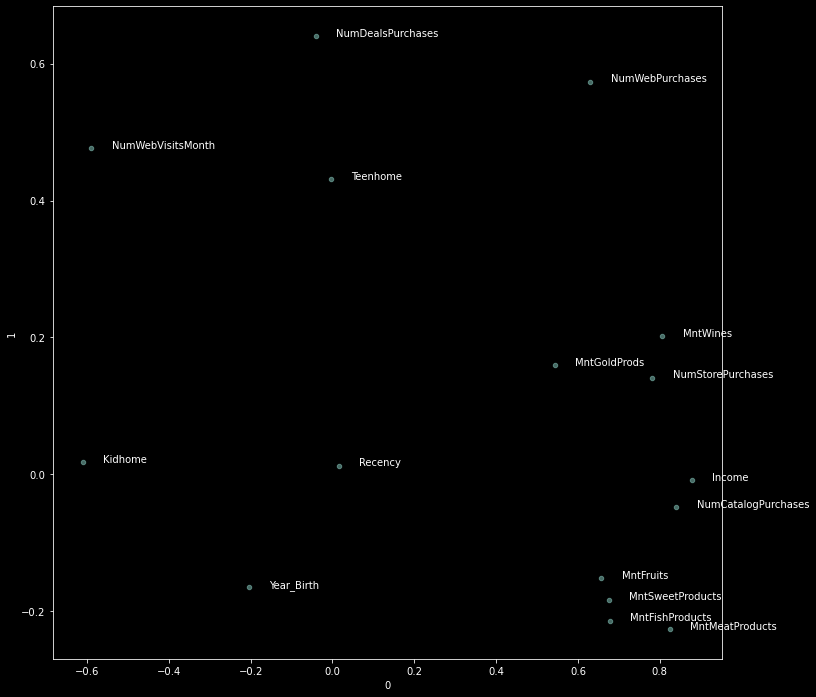

In [318]:
ax = fa_components.plot.scatter(x=0, y=1, alpha=0.5, figsize=(12,12))

for index, text in enumerate(fa_components.index):
    ax.annotate(text, (fa_components[0].iat[index]+0.05, fa_components[1].iat[index]))

    Interpretation:

    The X-axis represents the first factor, which is the single combination of all features that account for the most variance in the original data
    The Y-axis represents the second factor, which is the single combination of all features that accounts for the second most variance in the original data
    Each dot represents a feature, and its position shows the coorelation 

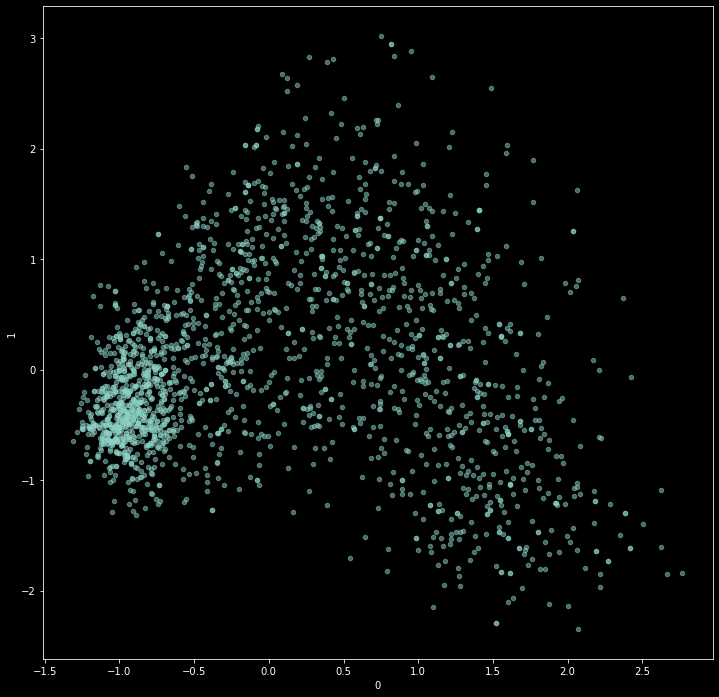

In [323]:
fa_transformed = pd.DataFrame(fa.transform(X_scaled))

ax = fa_transformed.plot.scatter(x=0, y=1, alpha=0.5, figsize=(12,12))

plt.show()

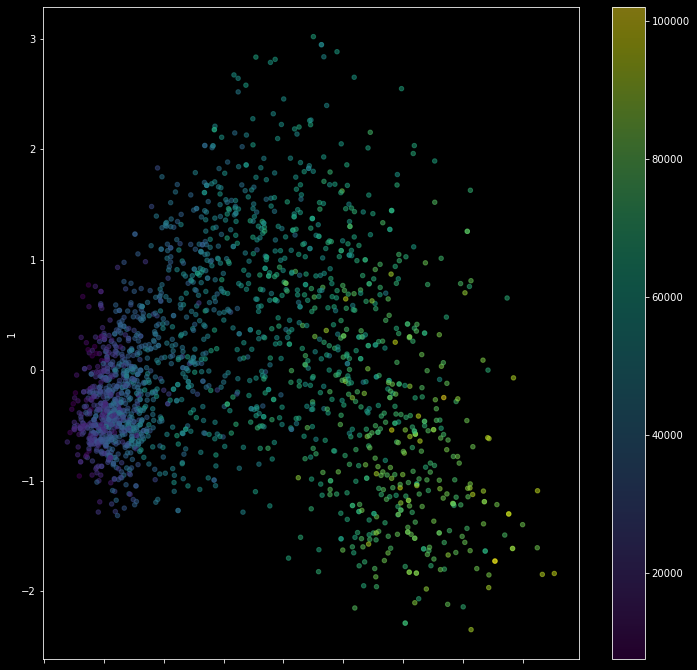

In [324]:
fa_transformed = pd.DataFrame(fa.transform(X_scaled))

ax = fa_transformed.plot.scatter(x=0, y=1, alpha=0.5, figsize=(12,12), c=df_subset['Income'], colormap='viridis')

plt.show()